In [297]:
import propka
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis
import propka.lib, propka.molecular_container
import os
from MDAnalysis.analysis import align

In [430]:
def calc_single(pdb):
    options, pdbfiles = propka.lib.loadOptions()
    my_molecule =propka.molecular_container.Molecular_container(pdb, options)
    my_molecule.calculate_pka()
    my_molecule.write_pka()
    name=os.path.basename(pdb)[:-4]
    file=open('%s.pka'%name)
    pKs={}
    data=[]
    sect=False        
    for line in file.readlines():
        if line.split():
            if sect:
                data.append(line.split())
            if line.split()[0]=="SUMMARY":
                sect=True
            if line.split()[0][0]=="-":
                sect=False
    for line in data[1:-1]:
        pKs[int(line[1])]=float(line[3])
    file.close()
    os.remove('%s.pka'%name)
#    os.remove('%i.propka_input'%(name))
    return pKs

In [394]:
pdb=('/home/knyazeva/bR/pK/tconv_1.1.pdb')
options, pdbfiles = propka.lib.loadOptions()
my_molecule =propka.molecular_container.Molecular_container(pdb, options)
my_molecule.calculate_pka()
my_molecule.write_pka()
calc_single(pdb)

{36: 3.22,
 38: 3.62,
 85: 5.97,
 96: 7.84,
 102: 3.71,
 104: 2.43,
 115: 7.12,
 212: 4.05,
 9: 4.24,
 74: 4.67,
 161: 4.64,
 166: 3.18,
 194: 10.14,
 204: 4.6,
 232: 4.61,
 234: 4.54,
 26: 10.08,
 43: 9.87,
 57: 15.23,
 64: 10.11,
 79: 12.22,
 83: 14.09,
 131: 10.48,
 133: 10.09,
 147: 10.35,
 150: 10.19,
 185: 18.32,
 30: 11.1,
 40: 10.37,
 41: 10.82,
 129: 10.37,
 159: 10.43,
 172: 10.24,
 216: 11.16,
 7: 13.29,
 82: 14.38,
 134: 10.73,
 164: 13.29,
 175: 11.71,
 225: 12.43,
 227: 12.45,
 4: 7.52}

In [441]:
def calc_ts(u,list_of_indexes,lastframe=None):
    pk = []       
    pk.append(['time', *[i for i in list_of_indexes]])
    if lastframe:
        iterator=u.trajectory[:lastframe]
    else:
        iterator=u.trajectory
    for ts in iterator:
        protein=u.select_atoms('protein')
        protein.write('%i.pdb' %(ts.frame))
        calc_single('%i.pdb' %(ts.frame))
        pk.append([u.trajectory.time, *[pKs[i] for i in list_of_indexes]])
        os.remove('%i.pdb'%(ts.frame))
    pk=np.array(pk)
    return pk


In [442]:
def calc(n):
    fr = 1
    pk = []
    while fr<15:
        u= ('/home/knyazeva/bR/pK/tconv_%d.1.pdb'%(fr))
        pKs=calc_single(u)
        pk.append([fr, pKs[n]])
        fr=fr+1
    pk=np.array(pk)
    return pk

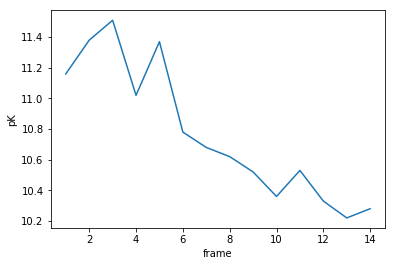

1.2899999999999991


In [443]:
pk_216=calc(216)
plt.plot(pk_216[:,0], pk_216[:,1])
plt.xlabel('frame')
plt.ylabel('pK')
plt.savefig('pk_216')
plt.show()
amplitude= max(np.array(pk_216[0:,1]))-min(np.array(pk_216[0:,1]))
print(amplitude)

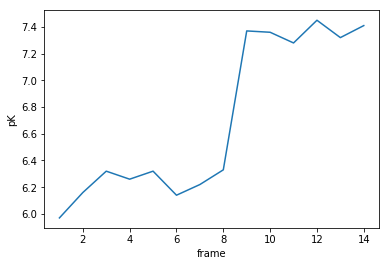

1.4800000000000004


In [446]:
pk_85=calc(85)
plt.plot(pk_85[:,0], pk_85[:,1])
plt.xlabel('frame')
plt.ylabel('pK')
plt.savefig('pk_85')
plt.show()
amplitude= max(np.array(pk_85[0:,1]))-min(np.array(pk_85[0:,1]))
print(amplitude)

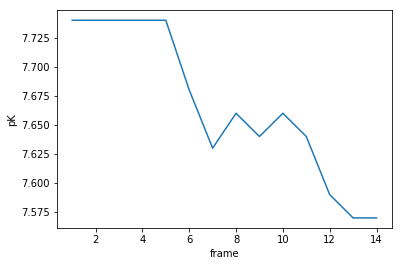

0.16999999999999993


In [160]:
pk_96=calc(96)
plt.plot(pk_96[:,0], pk_96[:,1])
plt.xlabel('frame')
plt.ylabel('pK')
plt.savefig('pk_96')
plt.show()
amplitude= max(np.array(pk_96[0:,1]))-min(np.array(pk_96[0:,1]))
print(amplitude)

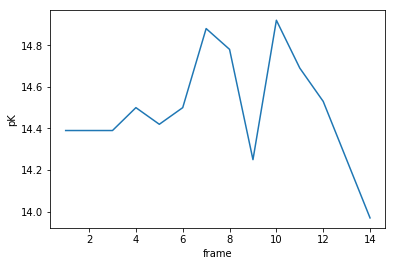

0.9499999999999993


In [159]:
pk_82=calc(82)
plt.plot(pk_82[:,0], pk_82[:,1])
plt.xlabel('frame')
plt.ylabel('pK')
plt.savefig('pk_82')
plt.show()
amplitude= max(np.array(pk_82[0:,1]))-min(np.array(pk_82[0:,1]))
print(amplitude)

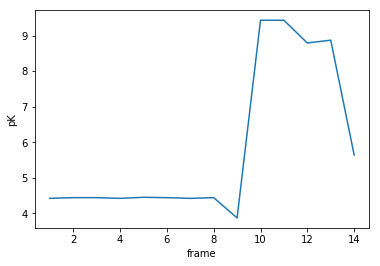

5.56


In [158]:
pk_204=calc(204)
plt.plot(pk_204[:,0], pk_204[:,1])
plt.xlabel('frame')
plt.ylabel('pK')
plt.savefig('pk_204')
plt.show()
amplitude= max(np.array(pk_204[0:,1]))-min(np.array(pk_204[0:,1]))
print(amplitude)

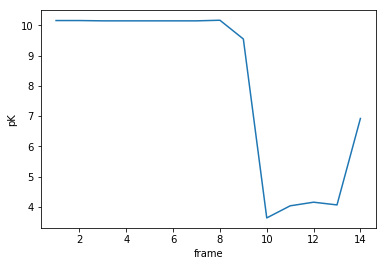

6.54


In [157]:
pk_194=calc(194)
plt.plot(pk_194[:,0], pk_194[:,1])
plt.xlabel('frame')
plt.ylabel('pK')
plt.savefig('pk_194')
plt.show()
amplitude= max(np.array(pk_194[0:,1]))-min(np.array(pk_194[0:,1]))
print(amplitude)

In [399]:
trj = MDAnalysis.Universe('/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.gro',
                          '/home/knyazeva/bR/Structures/charmm-gui/gromacs/step7_1.trr')
trj.select_atoms('resname LYR')[0].residue.resname='LYS'
trj_data=calc_ts(trj,[85,194,204,82,96,216])


/home/knyazeva/miniconda2/envs/MDA/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/home/knyazeva/miniconda2/envs/MDA/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/home/knyazeva/miniconda2/envs/MDA/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/home/knyazeva/miniconda2/envs/MDA/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


In [403]:
trj_data[0, :]

array(['time', '85', '194', '204', '82', '96', '216'], dtype='<U7')

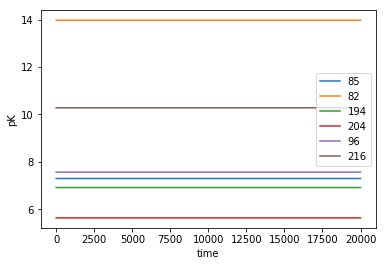

Asp 85:  7.299999999999998 ,  3.1554436208840472e-30
Arg 82:  13.97 ,  0.0
Glu 194:  6.920000000000001 ,  7.888609052210118e-31
Glu 204:  5.64 ,  0.0
Asp 96:  7.569999999999996 ,  1.9721522630525295e-29
Lys 216:  10.28 ,  0.0


In [422]:
x= [float(i) for i in trj_data[1:,0]]
y_85= [float(i) for i in trj_data[1:,1]]
y_82= [float(i) for i in trj_data[1:,4]]
y_194= [float(i) for i in trj_data[1:,2]]
y_204= [float(i) for i in trj_data[1:,3]]
y_96= [float(i) for i in trj_data[1:,5]]
y_216= [float(i) for i in trj_data[1:,6]]
plt.plot(x, y_85, label='85')
plt.plot(x, y_82, label='82')
plt.plot(x, y_194, label='194')
plt.plot(x, y_204, label='204')
plt.plot(x, y_96, label='96')
plt.plot(x, y_216, label='216')
plt.xlabel('time')
plt.ylabel('pK')
plt.legend()
plt.savefig('pk_exit_trj')
plt.show()

print('Asp 85: ', (np.mean(y_85)), ', ', (np.var(y_85)))
print('Arg 82: ', (np.mean(y_82)), ', ', (np.var(y_82)))
print('Glu 194: ', (np.mean(y_194)), ', ', (np.var(y_194)))
print('Glu 204: ', (np.mean(y_204)), ', ', (np.var(y_204)))
print('Asp 96: ', (np.mean(y_96)), ', ', (np.var(y_96)))
print('Lys 216: ', (np.mean(y_216)), ', ', (np.var(y_216)))